In [18]:
!pip install git+https://github.com/fujiisoup/pyspectra.git

import os
from os.path import join
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyspectra
from google_drive_tools import GoogleDrive

GoogleDrive.init_drive()

  Cloning https://github.com/fujiisoup/pyspectra.git to /private/var/folders/ds/x3jwf2s54c3190fl2p4lrn3w0000gn/T/pip-req-build-175kzncn
Using legacy 'setup.py install' for pyspectra, since package 'wheel' is not installed.
You should consider upgrading via the '/Users/atsushi/.anyenv/envs/pyenv/versions/3.8.1/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
file_names = [f'H_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  plasma_data.append(d.sum('y'))
plasma_data = xr.concat(plasma_data, dim='motor_coordinate')

In [7]:
file_names = [f'back_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

back_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  back_data.append(d.sum('y'))
back_data = xr.concat(back_data, dim='motor_coordinate')

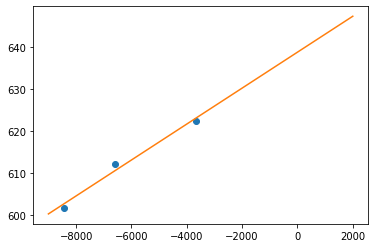

In [9]:
pixels = np.array([-8425, -6600, -3670])
wave = np.array([601.8299, 612.1787, 622.4815])
plt.plot(pixels, wave, 'o')

fun = np.poly1d(np.polyfit(pixels, wave, 1))
x = np.linspace(-9000, 2000, 100)
plt.plot(x, fun(x))

Text(0, 0.5, 'intencity (a.u.)')

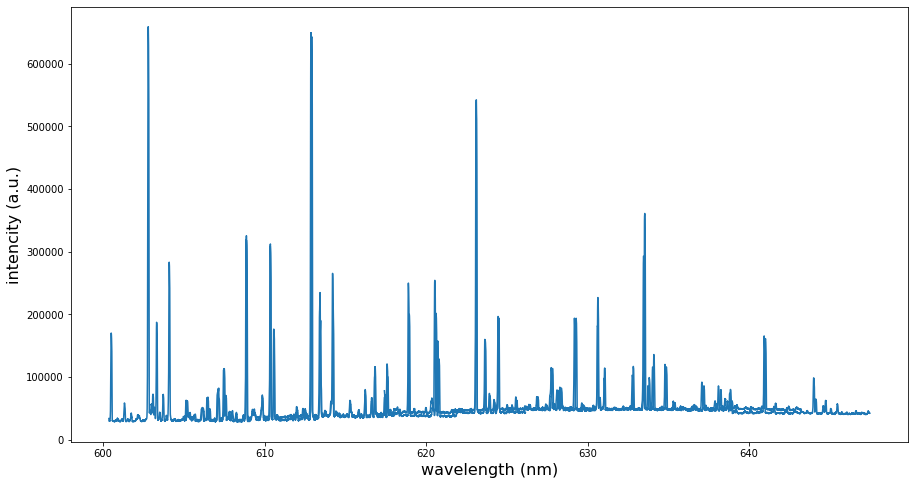

In [10]:
spectrum_data = plasma_data - back_data * 1.0

plt.figure(figsize=[15, 8])
for f in spectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wavelength (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

# D2

In [12]:
file_names = [f'D_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

Dplasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dplasma_data.append(d.sum('y'))
Dplasma_data = xr.concat(Dplasma_data, dim='motor_coordinate')

In [13]:
file_names = [f'Dback_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

Dback_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dback_data.append(d.sum('y'))
Dback_data = xr.concat(Dback_data, dim='motor_coordinate')

Text(0, 0.5, 'intencity (a.u.)')

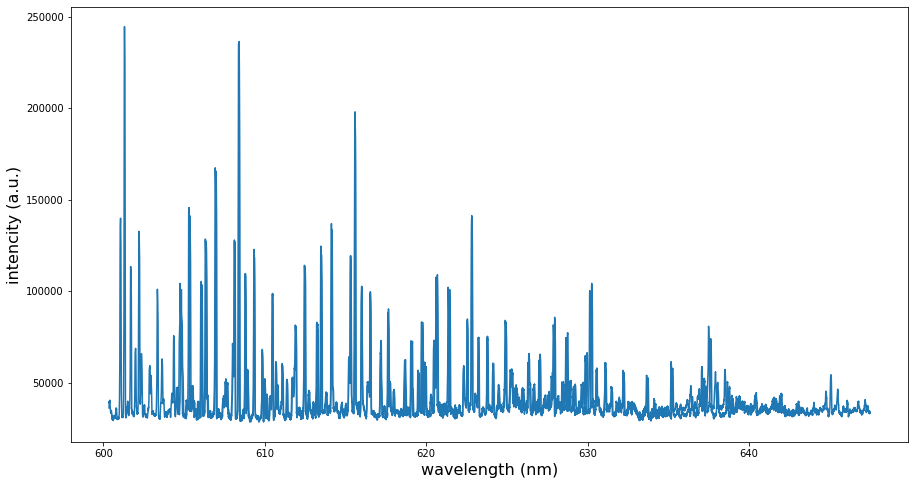

In [14]:
Dspectrum_data = Dplasma_data - Dback_data * 1.0

plt.figure(figsize=[15, 8])
for f in Dspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wavelength (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

# Ar

In [15]:
file_names = [f'Ar_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

Aplasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Aplasma_data.append(d.sum('y'))
Aplasma_data = xr.concat(Aplasma_data, dim='motor_coordinate')

In [16]:
file_names = [f'Dback_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = GoogleDrive.download_file('20201106', file_name)
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

Dback_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dback_data.append(d.sum('y'))
Dback_data = xr.concat(Dback_data, dim='motor_coordinate')

Text(0, 0.5, 'intencity (a.u.)')

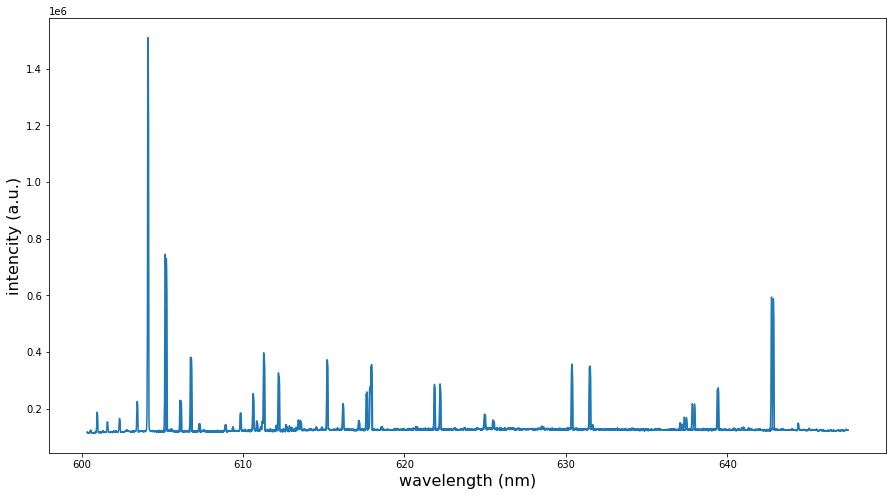

In [17]:
Aspectrum_data = Aplasma_data - Dback_data * 1.0

plt.figure(figsize=[15, 8])
for f in Aspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wavelength (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

<Figure size 432x288 with 0 Axes>

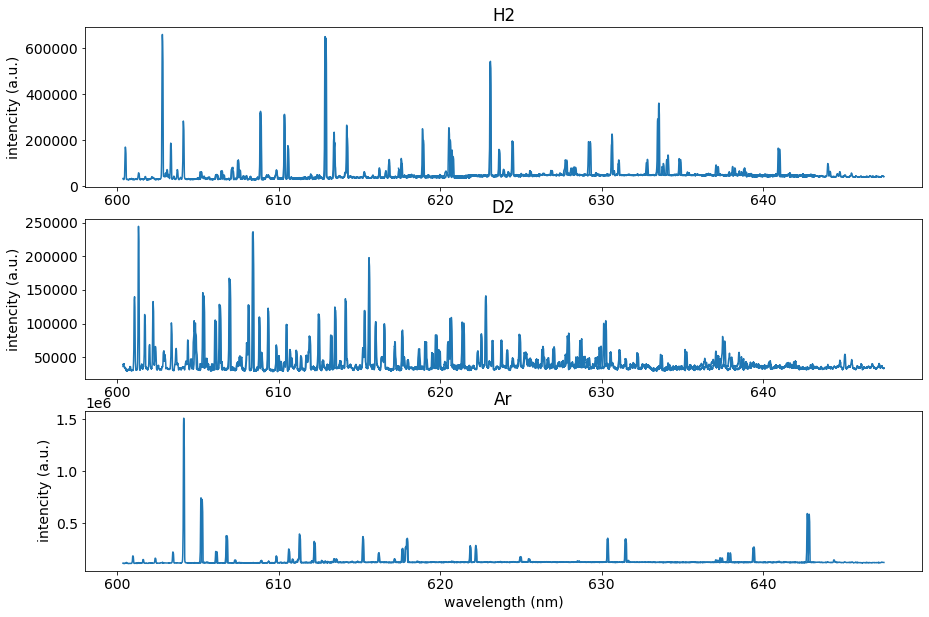

In [20]:
plt.subplots_adjust(top=2)
plt.figure(figsize=[15, 10])
plt.subplot(3, 1, 1)
plt.rcParams['font.size'] = 14
plt.title('H2')
plt.ylabel('intencity (a.u.)')
for f in spectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
plt.subplot(3, 1, 2)
plt.title('D2')
plt.ylabel('intencity (a.u.)')
for f in Dspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
plt.subplot(3, 1, 3)
plt.title('Ar')
plt.ylabel('intencity (a.u.)')
for f in Aspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')

plt.xlabel('wavelength (nm)')
plt.savefig(join(os.path.expanduser('~'), 'works', 'images', 'plasmas'))